In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rfcx-species-audio-detection/sample_submission.csv
/kaggle/input/rfcx-species-audio-detection/train_fp.csv
/kaggle/input/rfcx-species-audio-detection/train_tp.csv
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/18-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/08-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/13-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/11-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/02-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/07-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/27-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/23-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/04-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/30-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/01-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/

In [2]:
#Install libraries
!pip install librosa

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
import librosa

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

import IPython.display as ipd

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [4]:
from glob import glob

number_of_train = len(glob('../input/rfcx-species-audio-detection/train/*'))
number_of_test = len(glob('../input/rfcx-species-audio-detection/test/*'))

print('We have %d train records.' % (number_of_train))
print('We have %d test records.' % (number_of_test))

We have 4727 train records.
We have 1992 test records.


### Examine one audio file

In [5]:
audio_data1 = '../input/rfcx-species-audio-detection/train/005f1f9a5.flac'
x , sr = librosa.load(audio_data1)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(1323000,) 22050


In [6]:
ipd.Audio(audio_data1)

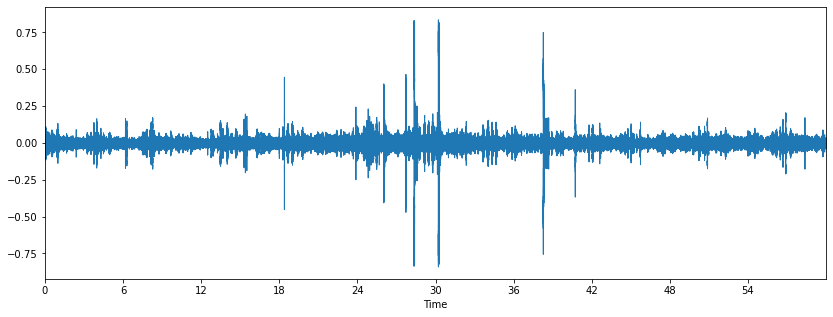

In [7]:

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

### Spectrogram

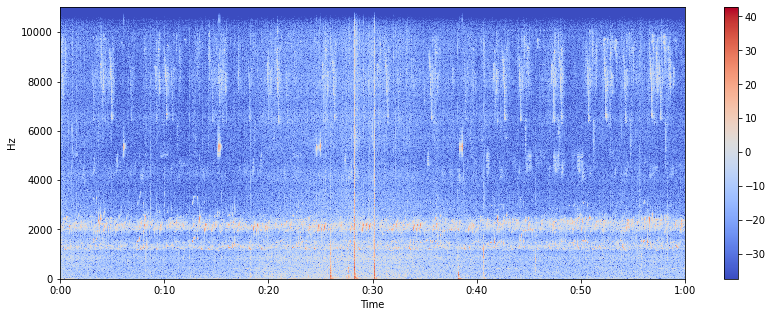

In [8]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Target

In [9]:
train_fp = pd.read_csv('../input/rfcx-species-audio-detection/train_fp.csv')

In [10]:
train_fp.head()

recording_id  species_id  songtype_id    t_min       f_min    t_max  \
0    00204008d          21            1  13.8400   3281.2500  14.9333   
1    00204008d           8            1  24.4960   3750.0000  28.6187   
2    00204008d           4            1  15.0027   2343.7500  16.8587   
3    003b04435          22            1  43.2533  10687.5000  44.8587   
4    003b04435          23            1   9.1254   7235.1562  15.2091   

        f_max  
0   4125.0000  
1   5531.2500  
2   4218.7500  
3  13687.5000  
4  11283.3984

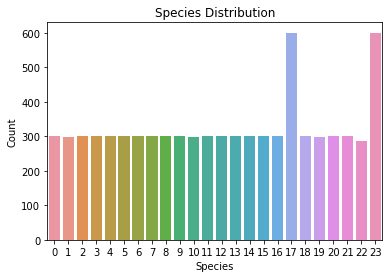

In [11]:
species_dist = train_fp.groupby('species_id')['recording_id'].count().reset_index()
sns.barplot(x=species_dist['species_id'], y=species_dist['recording_id'])
plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

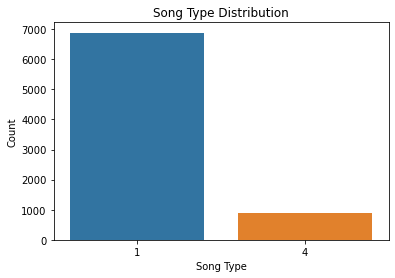

In [12]:
species_dist = train_fp.groupby('songtype_id')['recording_id'].count().reset_index()
sns.barplot(x=species_dist['songtype_id'], y=species_dist['recording_id'])
plt.title('Song Type Distribution')
plt.xlabel('Song Type')
plt.ylabel('Count')
plt.show()